<a href="https://colab.research.google.com/github/nawi-n/Eva-Voice-assistant/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the dataset and preprocessing**

In [39]:
data = pd.read_csv("sentiment[1].csv")

In [40]:
data["review"] = data["review"].str.lower()
data["review"] = data["review"].str.replace("[^a-zA-Z0-9 ]", "")

<ipython-input-40-a40ee048d9f4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["review"] = data["review"].str.replace("[^a-zA-Z0-9 ]", "")


#**Splitting the data into training and testing sets**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data["review"], data["sentiment"], test_size=0.2)

#**Vectorizing the text data**

In [42]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#**Building & training our classification model**

In [43]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

#**Evaluating its performance**

In [47]:
y_pred = model.predict(X_test_vec)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       477
           1       0.85      0.82      0.84       523

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



# **Visualizing using confusion matrix**

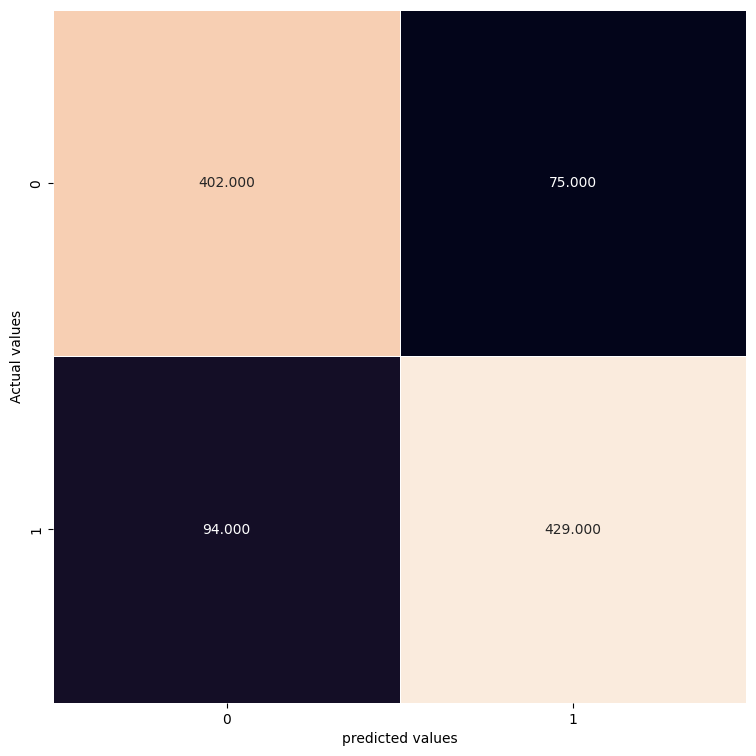

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = '0.3f', linewidth=0.5,
            square = True, cbar = False)
plt.ylabel("Actual values")
plt.xlabel("predicted values")
plt.show()

#**Testing with own test cases**

In [46]:
test = [
    "I am satisfied with the product",
    "It is worst and of low quality",
    "It is not as expected and I am disappointed",
     "worst!!!",
    "It is good and worth for the money"

]
x_test = vectorizer.transform(test)
predictions = model.predict(x_test.toarray())
print(predictions)


[1 0 0 0 1]
